In [1]:
!git clone https://github.com/Harilaxman27/Harilaxman27-Hexart_skin_disease.git
%cd Harilaxman27-Hexart_skin_disease/dataset


Cloning into 'Harilaxman27-Hexart_skin_disease'...
remote: Enumerating objects: 2036, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 2036 (delta 5), reused 10 (delta 1), pack-reused 2004 (from 1)
Receiving objects: 100% (2036/2036), 536.68 MiB | 19.97 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (2014/2014), done.
/content/Harilaxman27-Hexart_skin_disease/dataset


In [2]:
!pip install tensorflow keras pandas numpy matplotlib

In [10]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
import matplotlib.pyplot as plt



In [13]:
!git clone https://github.com/Harilaxman27/Harilaxman27-Hexart_skin_disease.git



Cloning into 'Harilaxman27-Hexart_skin_disease'...
remote: Enumerating objects: 2036, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 2036 (delta 5), reused 10 (delta 1), pack-reused 2004 (from 1)
Receiving objects: 100% (2036/2036), 536.68 MiB | 26.08 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (2014/2014), done.


In [14]:
%cd Harilaxman27-Hexart_skin_disease/dataset
!ls



/content/Harilaxman27-Hexart_skin_disease/dataset
ISIC_0024311.jpg  ISIC_0026796.jpg  ISIC_0029348.jpg  ISIC_0031915.jpg
ISIC_0024317.jpg  ISIC_0026797.jpg  ISIC_0029350.jpg  ISIC_0031920.jpg
ISIC_0024321.jpg  ISIC_0026798.jpg  ISIC_0029368.jpg  ISIC_0031922.jpg
ISIC_0024323.jpg  ISIC_0026802.jpg  ISIC_0029369.jpg  ISIC_0031926.jpg
ISIC_0024330.jpg  ISIC_0026803.jpg  ISIC_0029370.jpg  ISIC_0031927.jpg
ISIC_0024331.jpg  ISIC_0026813.jpg  ISIC_0029377.jpg  ISIC_0031934.jpg
ISIC_0024333.jpg  ISIC_0026836.jpg  ISIC_0029387.jpg  ISIC_0031937.jpg
ISIC_0024345.jpg  ISIC_0026837.jpg  ISIC_0029391.jpg  ISIC_0031941.jpg
ISIC_0024347.jpg  ISIC_0026838.jpg  ISIC_0029394.jpg  ISIC_0031942.jpg
ISIC_0024357.jpg  ISIC_0026843.jpg  ISIC_0029400.jpg  ISIC_0031943.jpg
ISIC_0024359.jpg  ISIC_0026844.jpg  ISIC_0029420.jpg  ISIC_0031947.jpg
ISIC_0024363.jpg  ISIC_0026845.jpg  ISIC_0029421.jpg  ISIC_0031953.jpg
ISIC_0024364.jpg  ISIC_0026846.jpg  ISIC_0029423.jpg  ISIC_0031954.jpg
ISIC_0024365.jpg  ISIC_0026

In [15]:
metadata = pd.read_csv('metadata.csv')

In [21]:
print(metadata.columns)


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')


In [22]:
X = []
y = []

for _, row in metadata.iterrows():
    img_name = row['image_id'] + '.jpg'   # image file name
    img = load_img(img_name, target_size=(64, 64))
    img_array = img_to_array(img)
    X.append(img_array.flatten())
    y.append(row['dx'])   # class label

X = np.array(X)

# Convert string labels (dx) to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)



In [23]:
X = X.reshape(X.shape[0], 64, 64*3)



In [24]:
model = Sequential()
model.add(LSTM(128, input_shape=(64, 64*3)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,063 (676.03 KB)

 Trainable params: 173,063 (676.03 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6102 - loss: 1.3157 - val_accuracy: 0.6700 - val_loss: 1.1592
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6608 - loss: 1.2022 - val_accuracy: 0.6700 - val_loss: 1.1303
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6525 - loss: 1.1627 - val_accuracy: 0.6700 - val_loss: 1.1768
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6739 - loss: 1.1332 - val_accuracy: 0.6700 - val_loss: 1.1798
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6622 - loss: 1.1806 - val_accuracy: 0.6700 - val_loss: 1.1663
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6744 - loss: 1.1579 - val_accuracy: 0.6700 - val_loss: 1.1704
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6744 - loss: 1.1101 - val_accuracy: 0.6700 - val_loss: 1.1546
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6636 - loss: 1.1616 - val_accuracy: 0.6700 - val_l

In [27]:
loss, acc = model.evaluate(X, y)
print(f"LSTM Model Accuracy: {acc*100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6569 - loss: 1.1696
LSTM Model Accuracy: 66.95%


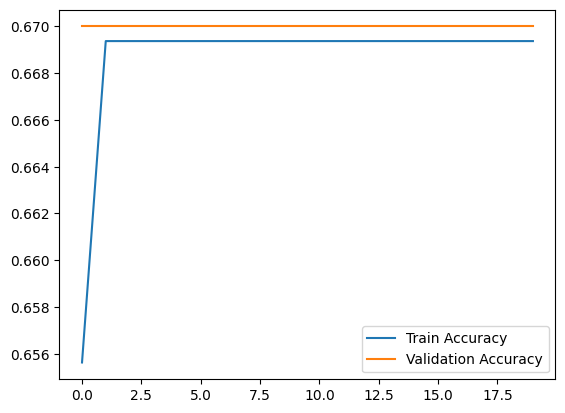

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [29]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,191 (1.98 MB)

 Trainable params: 173,063 (676.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 346,128 (1.32 MB)